# Step1.准备工作

In [ ]:
# 下载包
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install missingo
!pip install statsmodels
!pip install statsmodels
#torch在配置虚拟环境的时候已经安装了。

In [1]:
# 导入包
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import statsmodels.api as sm
import torch
import torch.nn as nn
import torch.nn.init as init
import torch.optim as optim

In [2]:
# 传入数据集

Train_data = pd.read_csv("./data/used_car_train_20200313.csv", sep = ' ')
Test_data = pd.read_csv("./data/used_car_testB_20200421.csv", sep = ' ')
#指定sep为空格，才能够正确读入数据

In [3]:
# 查看数据集规模

print("训练集数据规模:", Train_data.shape)
print("测试集数据规模:", Test_data.shape)

训练集数据规模: (150000, 31)
测试集数据规模: (50000, 30)


**可以看到，训练集有15w条数据，31个属性。测试集有5w条数据，30个属性，少的那一个属性就是我们要预测的价格：price**

In [4]:
# 浏览数据形式

Train_data.head().append(Train_data.tail())

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482
149995,149995,163978,20000607,121.0,10,4.0,0.0,1.0,163,15.0,...,0.280264,0.000310,0.048441,0.071158,0.019174,1.988114,-2.983973,0.589167,-1.304370,-0.302592
149996,149996,184535,20091102,116.0,11,0.0,0.0,0.0,125,10.0,...,0.253217,0.000777,0.084079,0.099681,0.079371,1.839166,-2.774615,2.553994,0.924196,-0.272160
149997,149997,147587,20101003,60.0,11,1.0,1.0,0.0,90,6.0,...,0.233353,0.000705,0.118872,0.100118,0.097914,2.439812,-1.630677,2.290197,1.891922,0.414931
149998,149998,45907,20060312,34.0,10,3.0,1.0,0.0,156,15.0,...,0.256369,0.000252,0.081479,0.083558,0.081498,2.075380,-2.633719,1.414937,0.431981,-1.659014
149999,149999,177672,19990204,19.0,28,6.0,0.0,1.0,193,12.5,...,0.284475,0.000000,0.040072,0.062543,0.025819,1.978453,-3.179913,0.031724,-1.483350,-0.342674


- name - 汽车编码
- regDate - 汽车注册时间
- model - 车型编码
- brand - 品牌
- bodyType - 车身类型
- fuelType - 燃油类型
- gearbox - 变速箱
- power - 汽车功率
- kilometer - 汽车行驶公里
- notRepairedDamage - 汽车有尚未修复的损坏
- regionCode - 看车地区编码
- seller - 销售方
- offerType - 报价类型
- creatDate - 广告发布时间
- price - 汽车价格
- ‘v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13','v_14' 【匿名特征，包含v0-14在内15个匿名特征】

In [5]:
# 查看info

Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             150000 non-null  int64  
 1   name               150000 non-null  int64  
 2   regDate            150000 non-null  int64  
 3   model              149999 non-null  float64
 4   brand              150000 non-null  int64  
 5   bodyType           145494 non-null  float64
 6   fuelType           141320 non-null  float64
 7   gearbox            144019 non-null  float64
 8   power              150000 non-null  int64  
 9   kilometer          150000 non-null  float64
 10  notRepairedDamage  150000 non-null  object 
 11  regionCode         150000 non-null  int64  
 12  seller             150000 non-null  int64  
 13  offerType          150000 non-null  int64  
 14  creatDate          150000 non-null  int64  
 15  price              150000 non-null  int64  
 16  v_

- **model、bodyType、fuelType和gearbox的有效值（Non-Null Count）小于15w，说明有部分数据在这些属性上存在缺失值。**

- **只有notRepairedDamage这个属性的Dtype是object，我们重点查看一下**

In [6]:
# 查看notRepairedDamage

Train_data['notRepairedDamage'].value_counts()

0.0    111361
-       24324
1.0     14315
Name: notRepairedDamage, dtype: int64

**存在24324个数据的取值为“-”。猜测“-”可能代表车辆未记录有无不可修复的损伤或者无法判断，值得注意的是这24324个数据是存在取值的，并不是缺失值。但“-”不好进行数据处理，所以我们决定把它变为nan。**


# Step2.数据处理

## 2.1处理缺失值


In [7]:
# 把notRepairedDamage的“-”取值替换为缺失值

Train_data['notRepairedDamage'].replace("-", np.nan, inplace = True)
Test_data['notRepairedDamage'].replace("-", np.nan, inplace = True)

Train_data['notRepairedDamage'].value_counts()
#替换成功。

0.0    111361
1.0     14315
Name: notRepairedDamage, dtype: int64

In [8]:
# 查看缺失值

Train_data.isnull().sum()

SaleID                   0
name                     0
regDate                  0
model                    1
brand                    0
bodyType              4506
fuelType              8680
gearbox               5981
power                    0
kilometer                0
notRepairedDamage    24324
regionCode               0
seller                   0
offerType                0
creatDate                0
price                    0
v_0                      0
v_1                      0
v_2                      0
v_3                      0
v_4                      0
v_5                      0
v_6                      0
v_7                      0
v_8                      0
v_9                      0
v_10                     0
v_11                     0
v_12                     0
v_13                     0
v_14                     0
dtype: int64

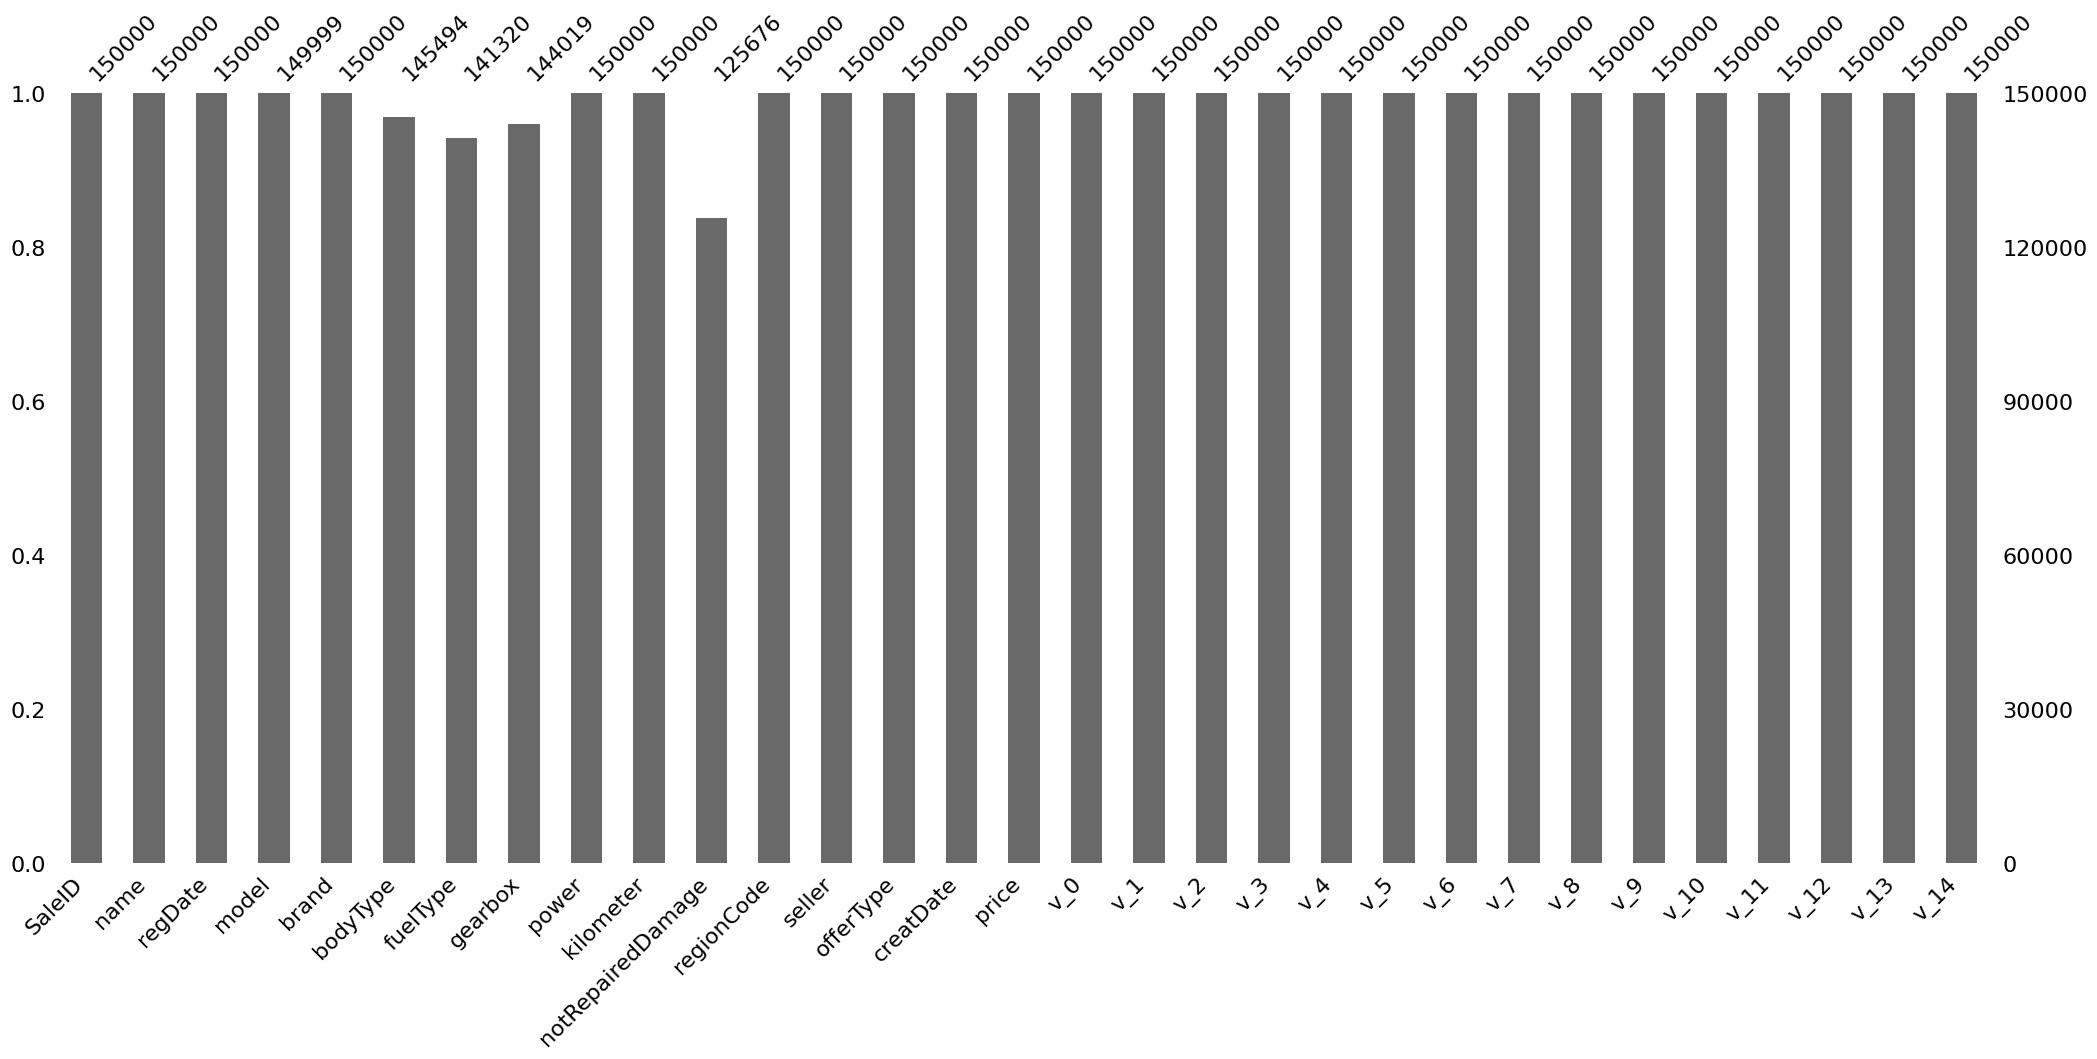

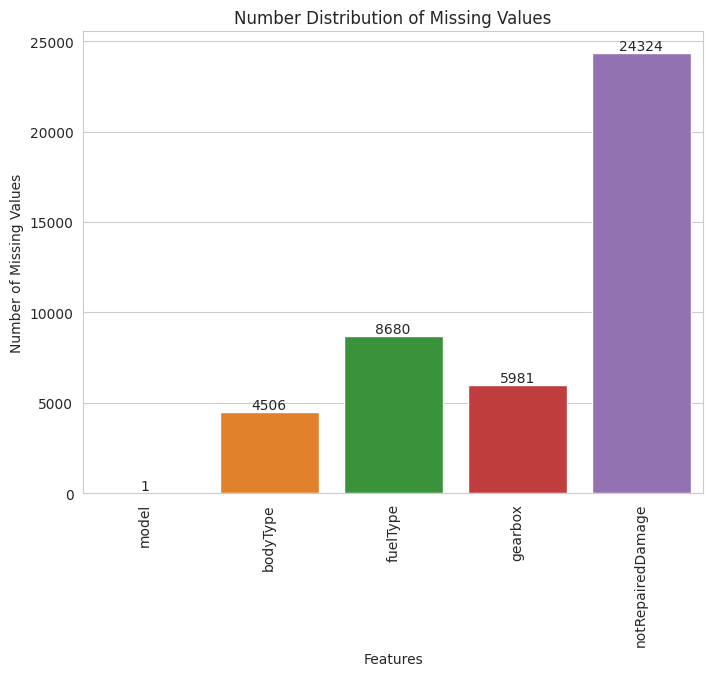

<AxesSubplot:>

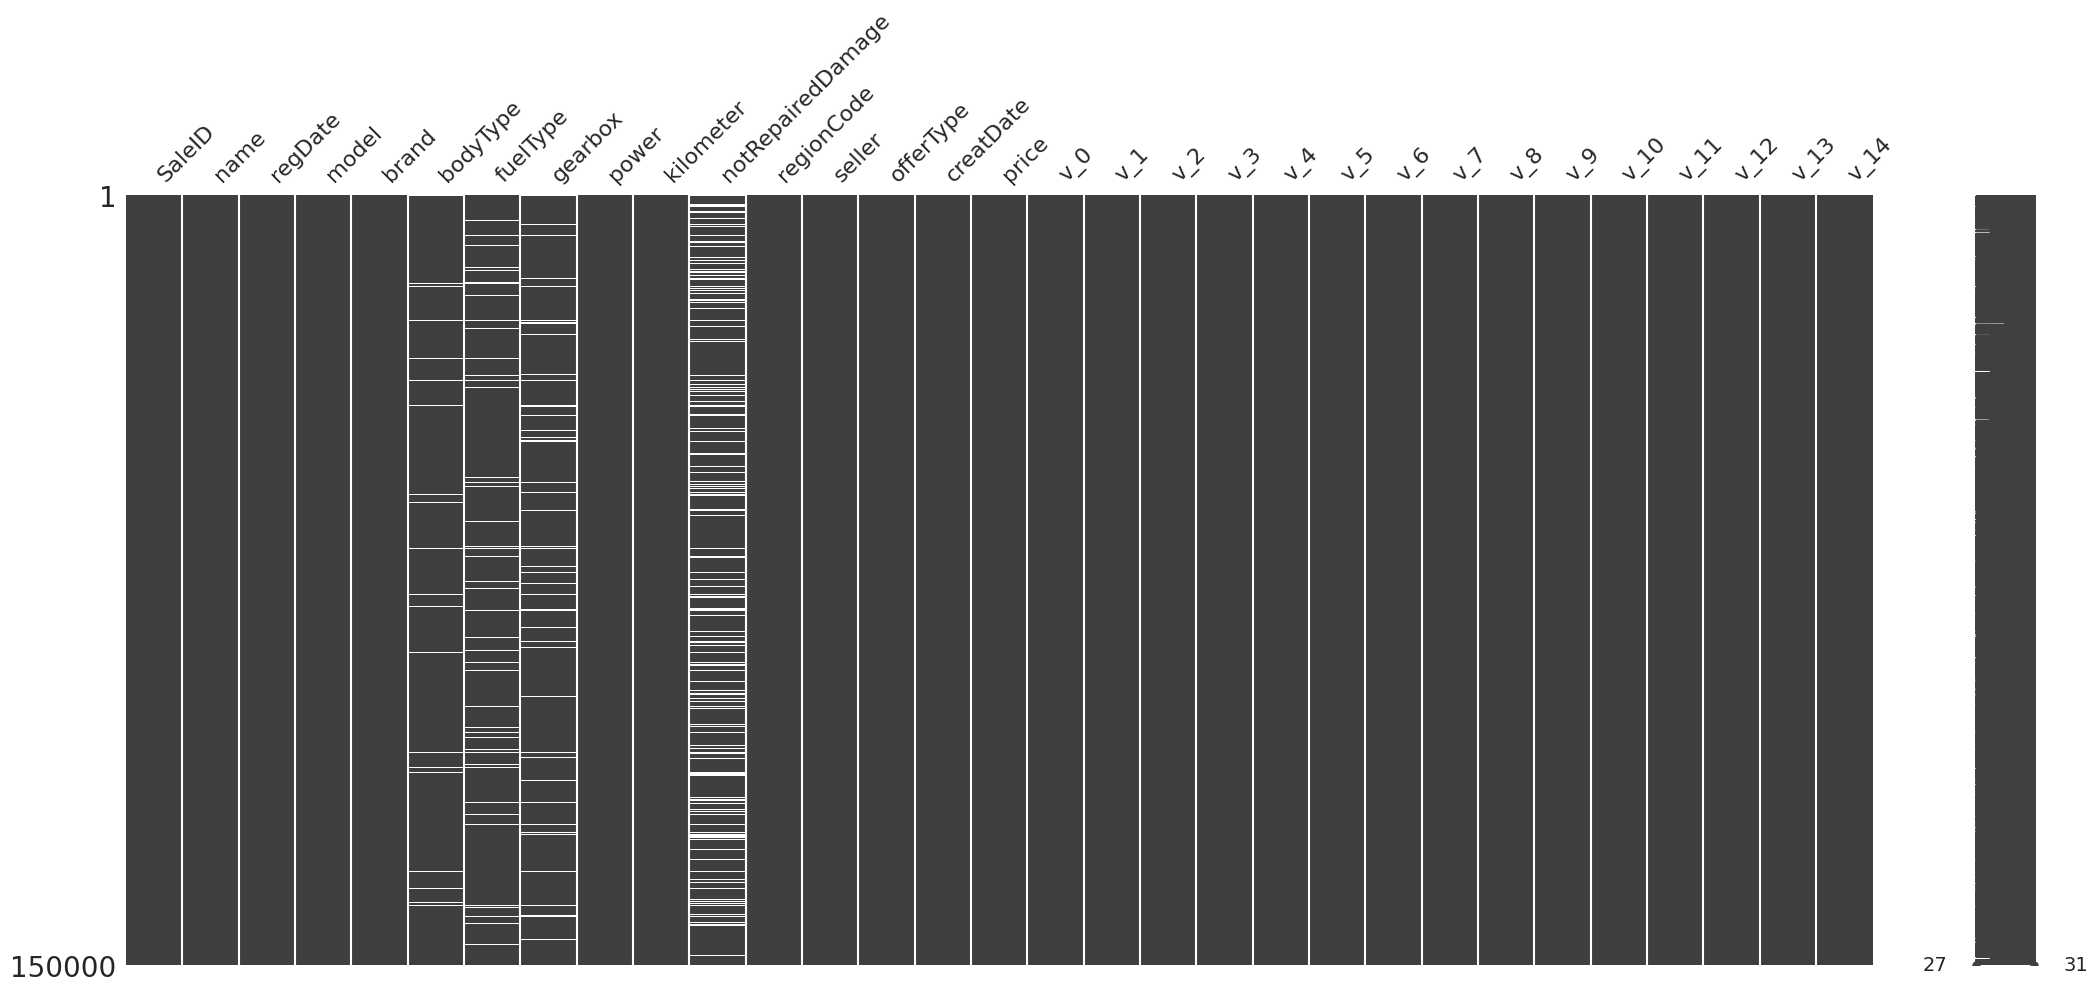

In [9]:
# 可视化缺失值

# 条形图
msno.bar(Train_data.sample(150000))

# 柱状图
sns.set_style('whitegrid')

# 计算缺失值
missing = Train_data.isnull().sum()
missing = missing[missing > 0]

# 将数据转化为长格式
f_missing = pd.DataFrame({'Features': missing.index, 'Missing Count': missing.values})

# 绘制图形
plt.figure(figsize=(8, 6))
sns.barplot(x='Features', y='Missing Count', data=f_missing)
plt.title('Number Distribution of Missing Values')
plt.xlabel('Features')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=90)

# 在每个柱状图上添加缺失值数量
for i in range(len(f_missing)):
    plt.text(i, f_missing.iloc[i]['Missing Count'], f_missing.iloc[i]['Missing Count'], ha='center', va='bottom')

# 显示
plt.show()
msno.matrix(Train_data.sample(150000))

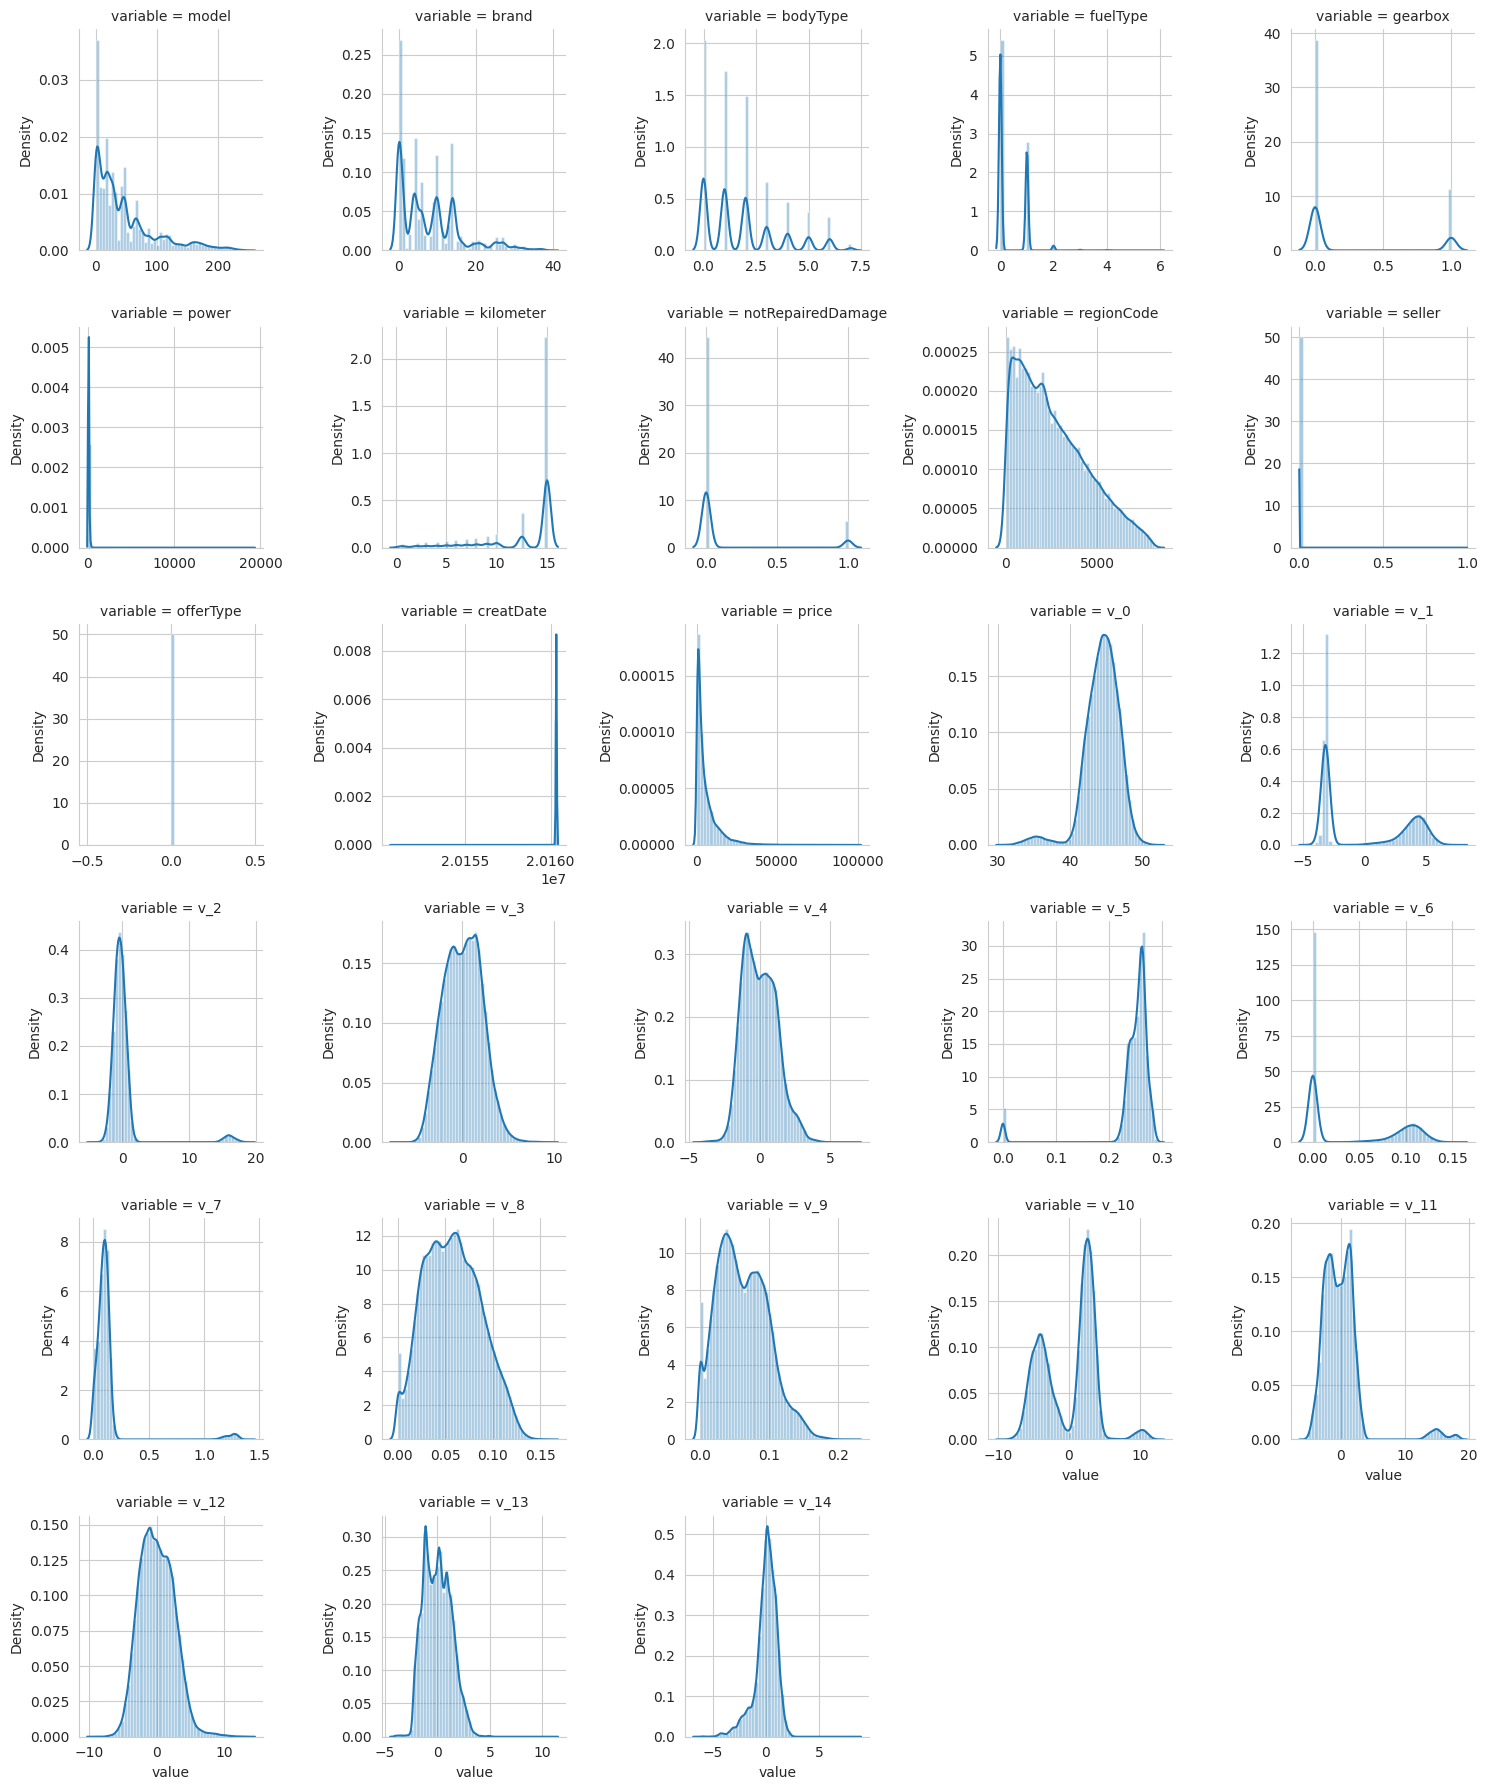

In [10]:
# 定义数字特征：（由于没有在数值类型上加以区分，因此我们需要人工挑选）
train_numeric_features= [
    'model', 'brand', 'bodyType', 'fuelType','gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode','seller', 'offerType', 'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3','v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12','v_13', 'v_14'
]
# 可视化训练集的数字特征的概率分布
sns.set_style('whitegrid')
Train_data[train_numeric_features].describe()
f_train = pd.melt(Train_data, value_vars=train_numeric_features)
g_train = sns.FacetGrid(f_train, col = 'variable', col_wrap=5, sharex=False, sharey=False)
g_train = g_train.map(sns.distplot, "value")

plt.show()

**观察分布，发现power，kilometer， power的分布不是很适合训练，需要对他们进行处理**

## 2.2观察price分布，处理长尾情况
price是我们要预测的值，会成为训练集的label。我们应该对price进行必要的观察和处理

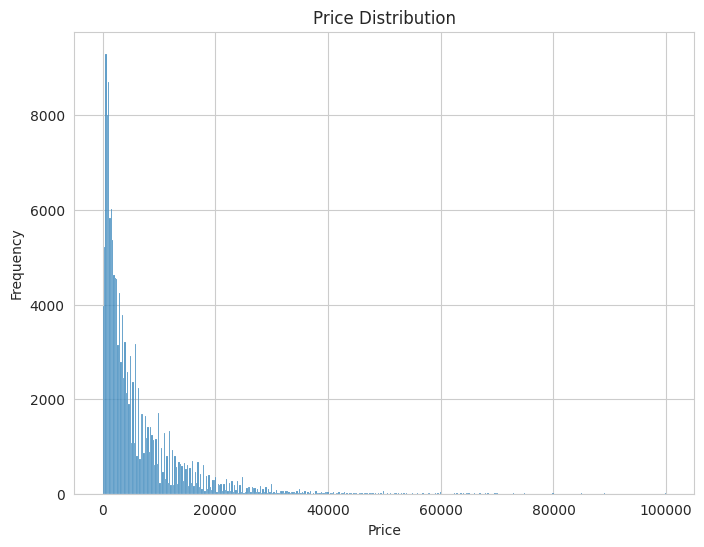

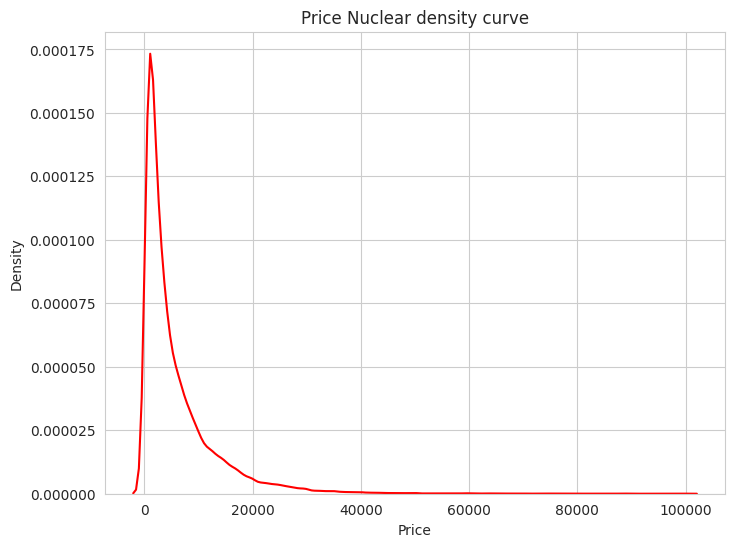

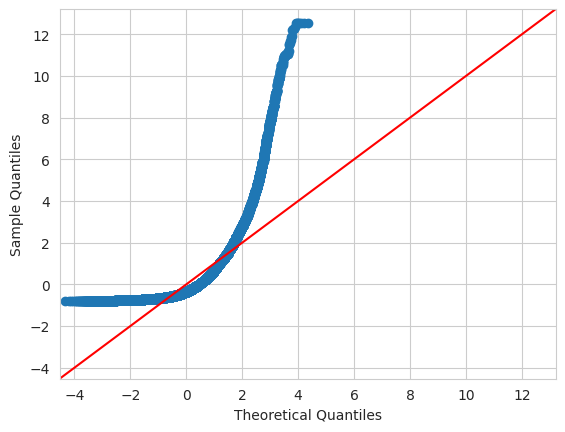

In [11]:
# 把Train_data中的price单独赋于target变量，输出概率分布

# 绘图
target = Train_data['price']
plt.figure(figsize=(8, 6))
sns.histplot(target, kde=False)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.figure(figsize=(8, 6))
sns.kdeplot(target, color='red')
plt.title('Price Nuclear density curve')
plt.xlabel('Price')
plt.ylabel('Density')

# Q-Q图
sm.qqplot(target, fit=True, line='45')

# 显示图形
plt.show()

- price在几千左右分布的非常密集，分布图像呈现长尾情况。需要进行压缩处理。
- QQ图显示的曲线和红线偏离越大，说明分布越不接近正态分布

In [12]:
# log压缩price属性

Train_data['price'] = np.log(Train_data['price'])

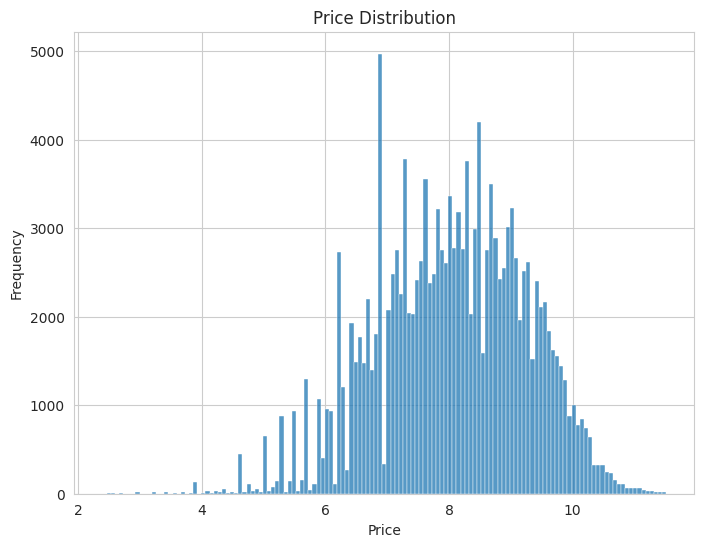

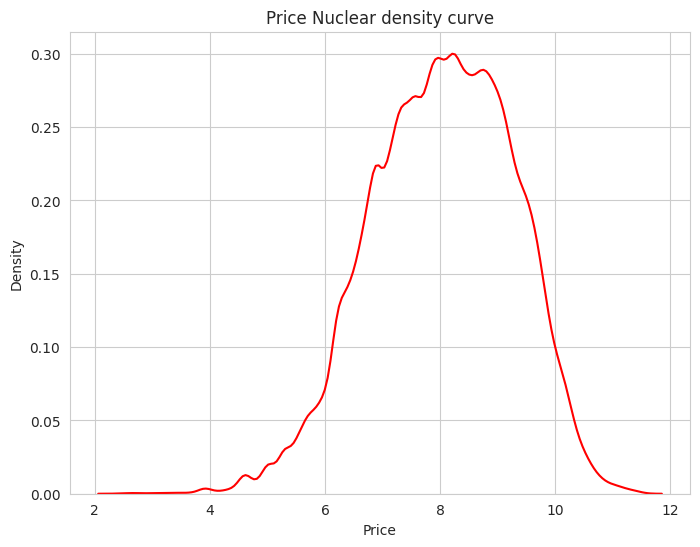

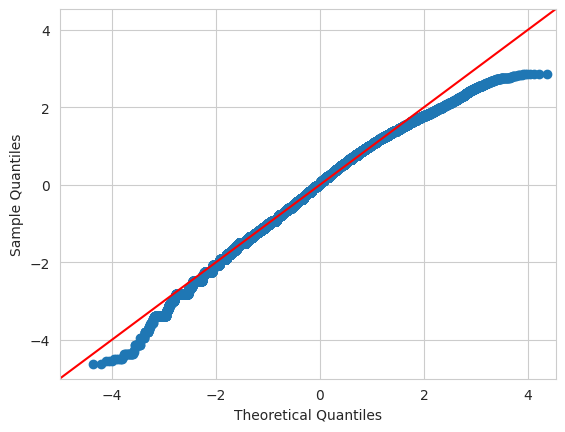

In [13]:
# 可视化处理后的price分布
target = Train_data['price']
plt.figure(figsize=(8, 6))
sns.histplot(target, kde=False)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.figure(figsize=(8, 6))
sns.kdeplot(target, color='red')
plt.title('Price Nuclear density curve')
plt.xlabel('Price')
plt.ylabel('Density')

# Q-Q图
sm.qqplot(target, fit=True, line='45')
# 显示图形
plt.show()

- 简单的log压缩得到的结果也不错
- QQ图更是可见一斑

## 2.3处理严重倾斜数据
seller和offerType的数据是严重倾斜，不是0就是1.对结果预测很不利，建议删除

In [14]:
## 查看seller、offerType取值
print("训练集的特征seller数据分布：")
print(Train_data['seller'].value_counts())

print("\n训练集的特征offerType数据分布：")
print(Train_data['offerType'].value_counts())

print("\n测试集的特征seller数据分布：")
print(Test_data['seller'].value_counts())

print("\n测试集的特征offerType数据分布：")
print(Test_data['offerType'].value_counts())

训练集的特征seller数据分布：
0    149999
1         1
Name: seller, dtype: int64

训练集的特征offerType数据分布：
0    150000
Name: offerType, dtype: int64

测试集的特征seller数据分布：
0    50000
Name: seller, dtype: int64

测试集的特征offerType数据分布：
0    50000
Name: offerType, dtype: int64


In [15]:
del Train_data["seller"]
del Train_data["offerType"]
del Test_data["seller"]
del Test_data["offerType"]

**合并训练集和测试集，方便统一处理特征**

In [16]:
# 标记数据来源，train = 1代表该数据来自训练集， train = 0代表该数据来自测试集，方便数据处理结束后拆分数据集
Train_data['train'] = 1
Test_data['train'] = 0

# 合并为df
df = pd.concat([Train_data, Test_data], ignore_index=True)

# Step3.特征工程

## 3.1构造使用时间
- 使用时间可以根据二手车的销售时间减去车辆的注册时间得到。
- 使用时间很大程度上影响二手物品的价格

**所以构造使用时间这个新的特征**

In [17]:
# make it
df['used_time'] = (pd.to_datetime(df['creatDate'], format='%Y%m%d', errors='coerce') - pd.to_datetime(df['regDate'], format='%Y%m%d', errors='coerce')).dt.days
#计算 df DataFrame 中的 creatDate 列和 regDate 列之间的时间差，并将结果存储在一个名为 used_time 的新列中

## 3.2构造出售城市
- regionCode大概率为城市邮编信息，从中提取出车辆的出售地
- 二手车的交易地址也会影响价格，这和地区的经济状况有关

**所以构造出售时间这个新的特征**

In [18]:
df['city'] = df['regionCode'].apply(lambda x : str(x)[:-3])
#删除 regionCode 中的后三位编码，留下前面1位，因为只留1位方便分类，类别最多就10种。如果留2位，不同类别最多有100个

#重传
df = df

## 3.3统计不同品牌的销售量
- 常识：不同品牌的车的售价区间是不同的，如豪车的二手价格区间大概率比普通车高
- 销售量越高的品牌，是否代表其在二手车市场更受欢迎？好卖与否会影响售价

**所以对不同品牌的车分类，统计每个品牌的销售量特征**

In [19]:
# 按照brand分类
Train_gb = Train_data.groupby('brand')

#定义
car_info = {}

#统计
for brand_name, brand_data in Train_gb:
    info = {}
    brand_data = brand_data[brand_data['price'] > 0] #price大于0的正常值
    info['This_brand_amount'] = len(brand_data)
    info['This_brand_price_max'] = brand_data.price.max()
    info['This_brand_price_median'] = brand_data.price.median()
    info['This_brand_price_min'] = brand_data.price.min()
    info['This_brand_price_sum'] = brand_data.price.sum()
    info['This_brand_price_std'] = brand_data.price.std()
    info['This_brand_price_average'] = round(brand_data.price.sum() / (len(brand_data) + 1), 2)
    car_info[brand_name] = info

#左拼接到df中
brand_feature = pd.DataFrame(car_info).T.reset_index().rename(columns={"index": "brand"})
df = df.merge(brand_feature, how='left', on='brand')

## 3.4power和kilometer特征处理
- 题目规定power取值为[0， 600]。我们要处理大于600的power数据
- power数据是否是不利于预测的分布，我们有必要查看并处理
- 对kilometer特征同理

<AxesSubplot:xlabel='power', ylabel='Density'>

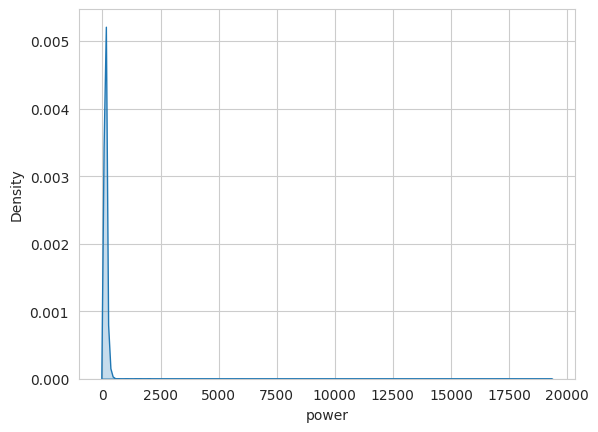

In [20]:
# 查看power特征分布
# 可视化处理后的price分布
sns.kdeplot(df['power'], shade=True)


**可以看到曲线画到了20000，是不是存在个别非常大的取值？**

In [21]:
# 查看是否有大于600或小于0的异常值
num = 0
zero_num = 0
for x in df['power']:
    if x == 0:
        zero_num = zero_num+1
    if x > 600 :
        num = num+1
print("有{}个数据大于600".format(num))
print("有{}个数据取值为0".format(zero_num))


有194个数据大于600
有17219个数据取值为0


<AxesSubplot:xlabel='power', ylabel='Density'>

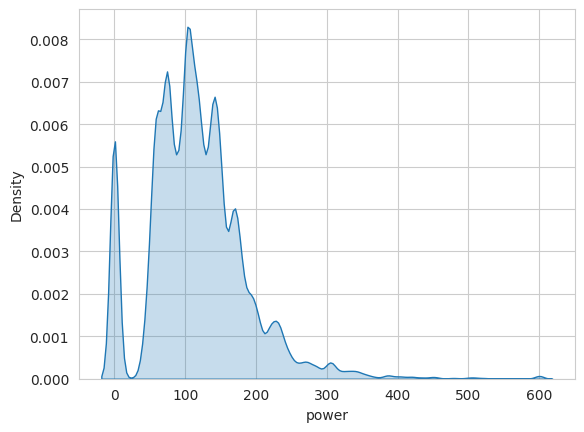

In [22]:
# 把大于600的取值替换为600
df['power'] = df['power'].map(lambda x: 600 if x > 600 else x)

#再次查看
if any(df['power'] > 600):
    print("错误：power列中存在大于600的值")

#查看处理后的power分布
sns.kdeplot(df['power'], shade=True)

In [23]:
# 数据分桶
bin = [i*10 for i in range(31)]
df['power_bin'] = pd.cut(df['power'], bin, labels=False)
df[['power_bin', 'power']].head()

,power_bin,power
0,5.0,60
1,NaN,0
2,16.0,163
3,19.0,193
4,6.0,68


In [24]:
#删除无用特征
df = df.drop(['creatDate', 'regDate', 'regionCode'], axis=1)

<AxesSubplot:xlabel='power', ylabel='Density'>

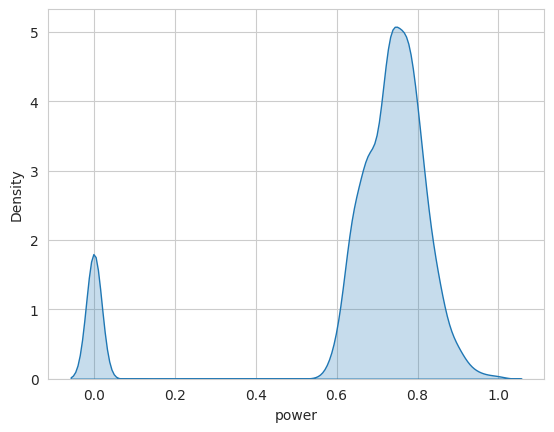

In [25]:
# 对power 的log压缩+归一化
#from sklearn import preprocessing
#MinMaxScaler = preprocessing.MinMaxScaler()
df['power'] = np.log(df['power'] + 1) #为了防止对0取log出现缺失值。
df['power'] = ((df['power'] - np.min(df['power'])) / (np.max(df['power']) - np.min(df['power'])))
sns.kdeplot(df['power'], shade=True)

<AxesSubplot:xlabel='kilometer', ylabel='Density'>

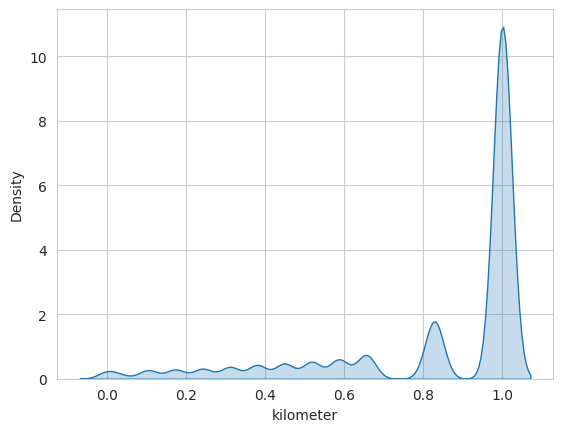

In [26]:
# 对kilometer的归一化
df['kilometer'] = ((df['kilometer'] - np.min(df['kilometer'])) / 
                        (np.max(df['kilometer']) - np.min(df['kilometer'])))

sns.kdeplot(df['kilometer'], shade=True)


In [27]:
# brand归一化
cols_to_normalize = ['This_brand_amount', 'This_brand_price_average', 'This_brand_price_max', 
                     'This_brand_price_median', 'This_brand_price_min', 'This_brand_price_std', 
                     'This_brand_price_sum']

for col in cols_to_normalize:
    df[col] = (df[col] - np.min(df[col])) / (np.max(df[col]) - np.min(df[col]))

## 3.5特征标准化
- 将数值型特征进行标准化处理，使得每个特征的均值为 0，方差为 1。标准化可以使得不同特征之间的数值范围相同，有利于优化算法的收敛以及提高模型的性能。
- 离散特征进行独热编码，将每个离散特征的每个取值都转换成一个新的二元特征。可以将离散特征转换成模型更容易处理的连续特征。

In [28]:
# 数字特征的标准化

numeric_features = ['power', 'kilometer', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13','v_14','used_time']
# 我们将每一个变量的均值和方差都存储到scaled_features变量中。
scaled_features = {}
for each in numeric_features:
    mean, std = df[each].mean(), df[each].std()
    scaled_features[each] = [mean, std]
    df.loc[:, each] = (df[each] - mean)/std

In [29]:
# 离散特征独热编码
df = pd.get_dummies(df, columns=['model', 'brand', 'bodyType', 'fuelType',
                                     'gearbox', 'notRepairedDamage', 'power_bin', 'city'])


# Step4.模型建立和训练

## 3.5准备训练集和测试集

In [30]:
#缺失值替换为-1
df = df.fillna(-1)

#拆分数据集
X_train = df[df['train'] == 1]
X_test = df[df['train'] != 1]

In [31]:
# 提取label
X_train_label = X_train.pop('price')

# 删掉数据集的标签和来源
del X_test['price']
del X_train['train']
del X_test['train']

# 剔除不必要的列
X_train_SaleID = X_train.pop('SaleID')
X_train_name = X_train.pop('name')
X_test_SaleID = X_test.pop('SaleID')
X_test_name = X_test.pop('name')

print(X_train.shape)
print(X_test.shape)


(150000, 371)
(50000, 371)


Epoch [10/5000], Loss: 7.4575
Epoch [20/5000], Loss: 7.3657
Epoch [30/5000], Loss: 7.0637
Epoch [40/5000], Loss: 5.9247
Epoch [50/5000], Loss: 2.2773
Epoch [60/5000], Loss: 0.9927
Epoch [70/5000], Loss: 0.4693
Epoch [80/5000], Loss: 0.2348
Epoch [90/5000], Loss: 0.1494
Epoch [100/5000], Loss: 0.1128
Epoch [110/5000], Loss: 0.1019
Epoch [120/5000], Loss: 0.0941
Epoch [130/5000], Loss: 0.0857
Epoch [140/5000], Loss: 0.0787
Epoch [150/5000], Loss: 0.0735
Epoch [160/5000], Loss: 0.0692
Epoch [170/5000], Loss: 0.0655
Epoch [180/5000], Loss: 0.0619
Epoch [190/5000], Loss: 0.0583
Epoch [200/5000], Loss: 0.0541
Epoch [210/5000], Loss: 0.0503
Epoch [220/5000], Loss: 0.0468
Epoch [230/5000], Loss: 0.0438
Epoch [240/5000], Loss: 0.0413
Epoch [250/5000], Loss: 0.0393
Epoch [260/5000], Loss: 0.0376
Epoch [270/5000], Loss: 0.0361
Epoch [280/5000], Loss: 0.0348
Epoch [290/5000], Loss: 0.0337
Epoch [300/5000], Loss: 0.0328
Epoch [310/5000], Loss: 0.0320
Epoch [320/5000], Loss: 0.0313
Epoch [330/5000],

Epoch [2620/5000], Loss: 0.0206
Epoch [2630/5000], Loss: 0.0206
Epoch [2640/5000], Loss: 0.0206
Epoch [2650/5000], Loss: 0.0207
Epoch [2660/5000], Loss: 0.0206
Epoch [2670/5000], Loss: 0.0206
Epoch [2680/5000], Loss: 0.0206
Epoch [2690/5000], Loss: 0.0205
Epoch [2700/5000], Loss: 0.0205
Epoch [2710/5000], Loss: 0.0205
Epoch [2720/5000], Loss: 0.0205
Epoch [2730/5000], Loss: 0.0205
Epoch [2740/5000], Loss: 0.0205
Epoch [2750/5000], Loss: 0.0205
Epoch [2760/5000], Loss: 0.0205
Epoch [2770/5000], Loss: 0.0205
Epoch [2780/5000], Loss: 0.0205
Epoch [2790/5000], Loss: 0.0205
Epoch [2800/5000], Loss: 0.0205
Epoch [2810/5000], Loss: 0.0205
Epoch [2820/5000], Loss: 0.0204
Epoch [2830/5000], Loss: 0.0204
Epoch [2840/5000], Loss: 0.0204
Epoch [2850/5000], Loss: 0.0204
Epoch [2860/5000], Loss: 0.0204
Epoch [2870/5000], Loss: 0.0204
Epoch [2880/5000], Loss: 0.0204
Epoch [2890/5000], Loss: 0.0204
Epoch [2900/5000], Loss: 0.0204
Epoch [2910/5000], Loss: 0.0203
Epoch [2920/5000], Loss: 0.0203
Epoch [2

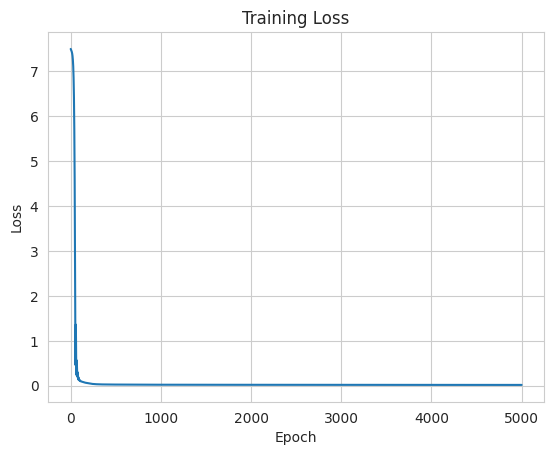

In [32]:
# 最初的模型

# 搭建模型
class MyModel(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, hidden_dim3, hidden_dim4,output_dim):
        super(MyModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.relu1 = nn.LeakyReLU(0.01)
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_dim2, hidden_dim3)
        self.relu3 = nn.LeakyReLU(0.01)
        self.fc4 = nn.Linear(hidden_dim3,hidden_dim4)
        self.relu4 = nn.ReLU()
        self.fc5 = nn.Linear(hidden_dim4, output_dim)
        
        
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        out = self.relu3(out) 
        out = self.fc4(out)
        out = self.relu4(out)
        out =self.fc5(out)
        return out
    
# 超参数设定
input_dim = X_train.shape[1]
hidden_dim1 = 100
hidden_dim2 = 50
hidden_dim3 = 25
hidden_dim4 = 15
output_dim = 1
learning_rate = 0.001
num_epochs = 5000


# 初始化模型
model = MyModel(input_dim, hidden_dim1, hidden_dim2, hidden_dim3,hidden_dim4, output_dim)


# 定义损失函数和优化器
criterion = nn.HuberLoss()  # 损失函数是MSELoos，可以换成L1loos，使用：nn.L1Loss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


# 将模型参数和张量转换为CUDA张量
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
x_train = torch.tensor(X_train.values, dtype = torch.float32).to(device)
y_train = torch.tensor(X_train_label.values.reshape(-1, 1), dtype = torch.float32).to(device)


train_losses = []

# 训练模型
for epoch in range(num_epochs):
    # 前向传播
    y_pred = model(x_train)
    loss = criterion(y_pred, y_train)
    train_losses.append(loss.item())
    # 反向传播和参数更新
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # 输出结果
    if(epoch +1)%10 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))


# 可视化训练过程中的loss值
plt.plot(range(num_epochs), train_losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [33]:
# 测试模型

x_test = torch.tensor(X_test.values, dtype=torch.float32).to(device)
y_pred = pd.DataFrame(np.exp(model(x_test).cpu().detach().numpy()))

y_test_id = pd.read_csv('./data/used_car_sample_submit.csv')
result = pd.concat([y_test_id['SaleID'],y_pred], axis=1)
result.columns = ['SaleID','price']
result.to_csv('./prediction_result/predictions.csv', index=False)
